In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df_facebook = pd.read_csv('data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
df_earthquakes = pd.read_csv('data/earthquakes.csv')

In [3]:
df_facebook.sample(5)

,open,high,low,close,volume
date,,,,,
2018-09-25,161.99,165.5900,161.1500,164.91,27622806
2018-02-08,181.01,181.8400,171.4815,171.58,38478321
2018-10-10,156.82,157.6900,151.3100,151.38,30609970
2018-08-28,178.10,178.2399,175.8300,176.26,15910675
2018-01-16,181.50,181.7500,178.0400,178.39,36183842


In [4]:
df_facebook.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-01-02 to 2018-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    251 non-null    float64
 1   high    251 non-null    float64
 2   low     251 non-null    float64
 3   close   251 non-null    float64
 4   volume  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [5]:
df_earthquakes.sample(5)

,mag,magType,time,place,tsunami,parsed_place
1494,1.18,md,1539002763250,"15km E of Pinnacles, CA",0,California
1875,4.70,mb,1538881270700,"177km WSW of Chichi-shima, Japan",0,Japan
7073,0.57,md,1537779069420,"9km WNW of The Geysers, CA",0,California
4464,0.27,md,1538285306040,"6km WNW of Cobb, CA",0,California
6665,1.60,ml,1537865817302,"92km NW of Arctic Village, Alaska",0,Alaska


In [6]:
df_earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9332 entries, 0 to 9331
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mag           9331 non-null   float64
 1   magType       9331 non-null   object 
 2   time          9332 non-null   int64  
 3   place         9332 non-null   object 
 4   tsunami       9332 non-null   int64  
 5   parsed_place  9332 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 437.6+ KB


> 1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.


<Axes: >

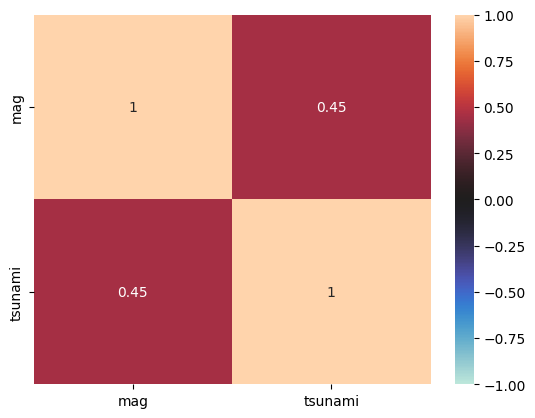

In [7]:
sns.heatmap(
    df_earthquakes.query('magType == "mb"')[['mag', 'tsunami']].corr(), annot=True, center=0, vmin=-1, vmax=1
)

> 2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 _ IQR and Q3 + 1.5 _ IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)


In [10]:
cols = ['volume', 'close']

quantiles = df_facebook[cols].quantile([0.25, 0.75])
quantiles.loc['iqr', :] = quantiles.loc[0.75,:] - quantiles.loc[0.25,:]

quantiles

,volume,close
0.25,17828394.0,157.915
0.75,30313840.0,185.270
iqr,12485446.0,27.355


Text(0.5, 0.98, 'Facebook Volume Traded and Closing Prices with bounds of a Turkey fence')

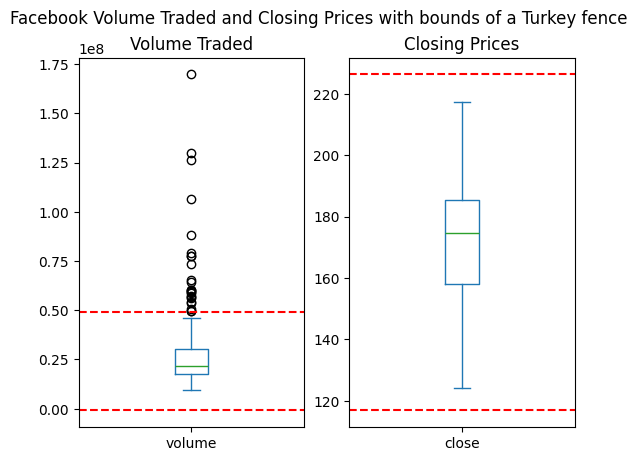

In [13]:
axes = df_facebook[cols].plot(
    kind='box',
    subplots=True,
    title=['Volume Traded', 'Closing Prices']
)

for ax, col, in zip(axes, cols):
    qnt = quantiles[col]
    lower_qnt = qnt.loc[0.25] - (1.5 * qnt['iqr'])
    upper_qnt = qnt.loc[0.75] + (1.5 * qnt['iqr'])
    
    for line in [lower_qnt, upper_qnt]:
        ax.axhline(line, color='red', linestyle='dashed')
        
plt.suptitle('Facebook Volume Traded and Closing Prices with bounds of a Turkey fence')

> 3. Fill in the area between the bounds in the plot from #2. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.


Text(0.5, 0.98, 'Facebook Closing Price with Decline Highlighted')

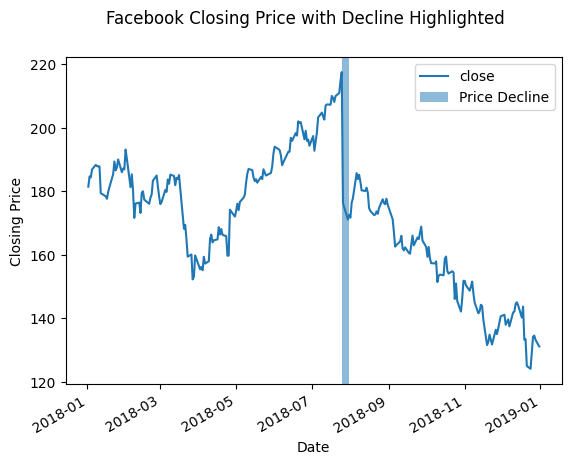

In [39]:
df_facebook['close'].plot(kind='line')

plt.axvspan(
    '2018-07-25', '2018-07-31', 
    alpha=0.5, 
    label='Price Decline'
)

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.suptitle('Facebook Closing Price with Decline Highlighted')

> 4. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
>
> - A. Disappointing user growth announced after close on July 25, 2018
> - B. Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
> - C. FTC launches investigation on March 20, 2018


Text(0.5, 0.98, 'Facebook Closing Price')

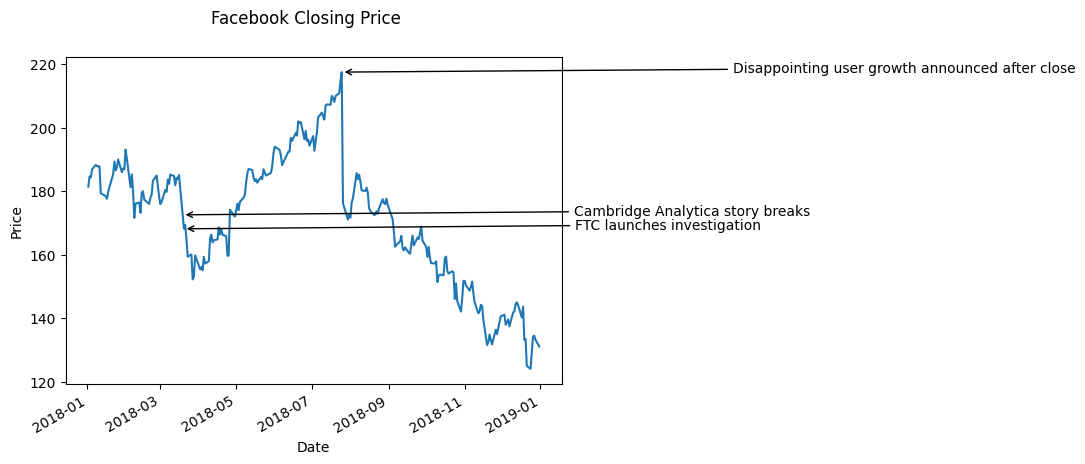

In [37]:
annotations = [
    {
        'text': 'Disappointing user growth announced after close',
        'date': '2018-07-25'
    },
    {
        'text': 'Cambridge Analytica story breaks',
        'date': '2018-03-19'
    },
    {
        'text': 'FTC launches investigation',
        'date': '2018-03-20'
    },
]

df_facebook['close'].plot(kind='line')

for ann in annotations:
    x = pd.to_datetime(ann['date'])
    y = df_facebook['close'][x]
    jitter = np.random.uniform(-20, -10, 1)
    
    plt.annotate(
        ann['text'],
        xy=(x, y),
        xytext=(x + pd.Timedelta(weeks=45), y),
        arrowprops=dict(arrowstyle='->')
    )

plt.xlabel('Date')
plt.ylabel('Price')

plt.suptitle('Facebook Closing Price')


> 5. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.


In [68]:
from matplotlib import cm

def reg_resid_plots(df):
    cols = df.columns
    num_cols = len(cols)
    fig, axes = plt.subplots(2, 2)
    cmap = cm.get_cmap('Set2')  
    
    x = df['close']
    y = df['volume']

    sns.regplot(x=x, y=y, data=df, ax=axes[0, 0], color=cmap(1))
    axes[0, 0].set_title(f'Regression: close vs volume')
    
    sns.residplot(x=x, y=y, data=df, ax=axes[0, 1], color=cmap(2))
    axes[0, 1].set_title(f'Residuals: close vs volume')
    axes[0, 1].set_ylabel('Residuals')
    

    sns.regplot(x=y, y=x, data=df, ax=axes[1, 0], color=cmap(1))
    axes[1, 0].set_title(f'Regression: volume vs close')
    
    sns.residplot(x=y, y=x, data=df, ax=axes[1, 1], color=cmap(2))
    axes[1, 1].set_title(f'Residuals: volume vs close')
    axes[1, 1].set_ylabel('Residuals')

    plt.tight_layout()
    plt.show()

C:\Users\JOSHUA KYLE\AppData\Local\Temp\ipykernel_45740\2591946293.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2')


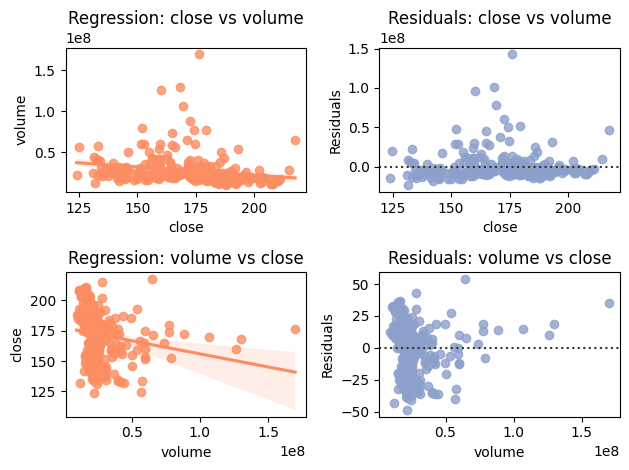

In [69]:
reg_resid_plots(df_facebook[['close', 'volume']])